In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

In [12]:
housing = pd.read_csv('../data/raw/AmesHousing.csv')

In [13]:
housing.dtypes.value_counts()

object     43
int64      28
float64    11
Name: count, dtype: int64

In [17]:
housing.dtypes

Order                int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

180796.0600682594
Neighborhood
Blmngtn    196661.678571
Blueste    143590.000000
BrDale     105608.333333
BrkSide    124756.250000
ClearCr    208662.090909
CollgCr    201803.434457
Crawfor    207550.834951
Edwards    130843.381443
Gilbert    190646.575758
Greens     193531.250000
GrnHill    280000.000000
IDOTRR     103752.903226
Landmrk    137000.000000
MeadowV     95756.486486
Mitchel    162226.631579
NAmes      145097.349887
NPkVill    140710.869565
NWAmes     188406.908397
NoRidge    330319.126761
NridgHt    322018.265060
OldTown    123991.891213
SWISU      135071.937500
Sawyer     136751.152318
SawyerW    184070.184000
Somerst    229707.324176
StoneBr    324229.196078
Timber     246599.541667
Veenker    248314.583333
Name: SalePrice, dtype: float64


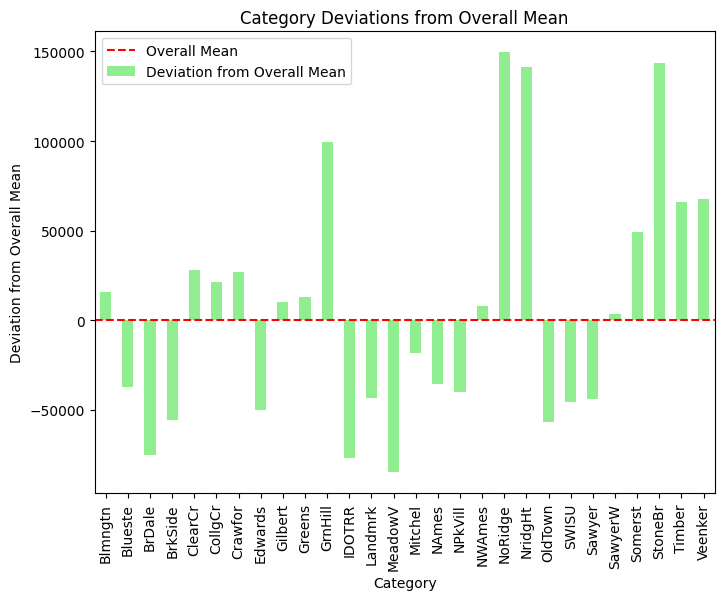

In [15]:
average: np.double = housing['SalePrice'].mean()
category_averages = housing.groupby('Neighborhood')['SalePrice'].mean()
print(average)
print(category_averages)

deviations = category_averages - average

plt.figure(figsize=(8, 6))

# Plot the category deviations
deviations.plot(kind='bar', color='lightgreen', label='Deviation from Overall Mean')

# Add a horizontal line at 0 (which represents the overall mean)
plt.axhline(y=0, color='r', linestyle='--', label='Overall Mean')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Deviation from Overall Mean')
plt.title('Category Deviations from Overall Mean')
plt.legend()

# Show plot
plt.show()


There seems to be a big disparity between the prices of houses in different neghiborhoods. Idealy this should be used in our models.

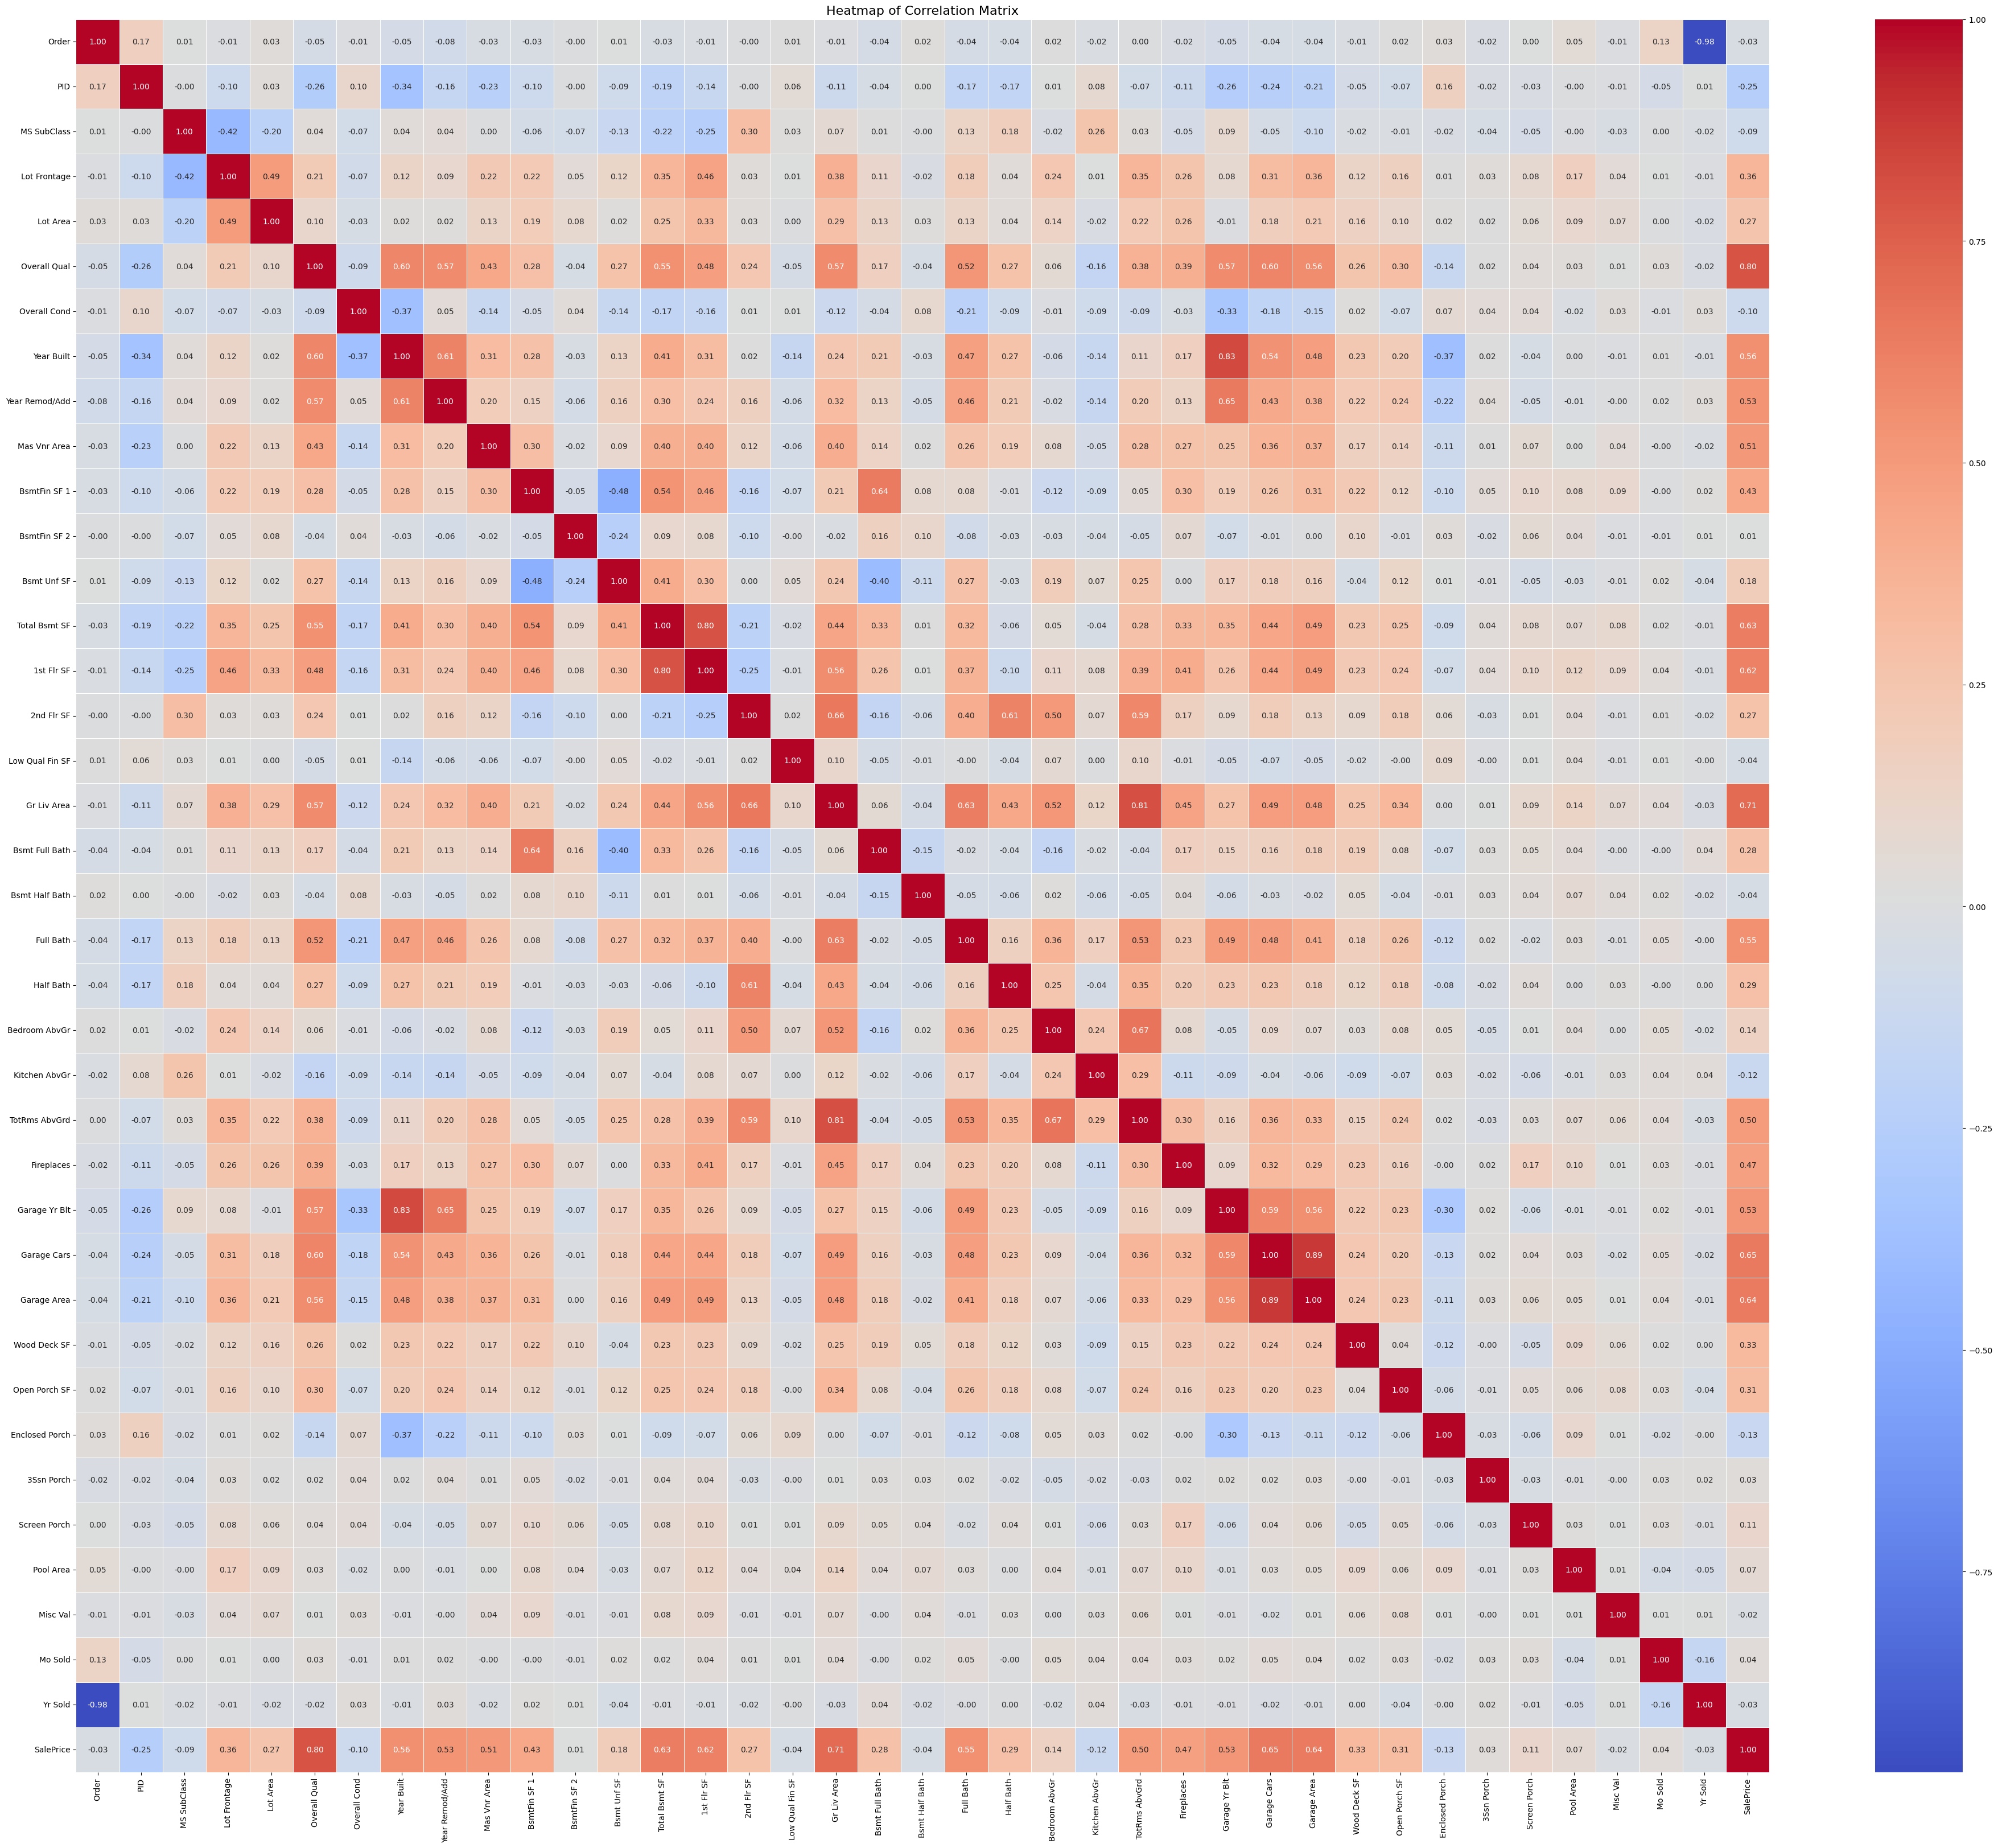

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_correlation_heatmap(data, figsize=(48, 40)):
    """
    Funksjon for å plotte et korrelasjonsvarmekart (heatmap).
    Args:
        data (pd.DataFrame): Datasettet som skal visualiseres.
        figsize (tuple): Størrelsen på figuren.
    """
    # Filtrer kun numeriske kolonner
    data_numeric = data.select_dtypes(include=['float64', 'int64'])
    
    # Sjekk om vi har numeriske kolonner
    if data_numeric.empty:
        print("Ingen numeriske kolonner tilgjengelig for korrelasjon.")
        return
    
    # Beregn korrelasjonsmatrisen
    corr_matrix = data_numeric.corr()

    # Plot heatmap med annotasjoner
    plt.figure(figsize=figsize)
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
    plt.title('Heatmap of Correlation Matrix', fontsize=16)
    plt.show()

# Kall på funksjonen for å vise heatmap med dataene
plot_correlation_heatmap(pd.read_csv('../data/processed/housing_encoded.csv'))

Table to show correlation between caloumns.